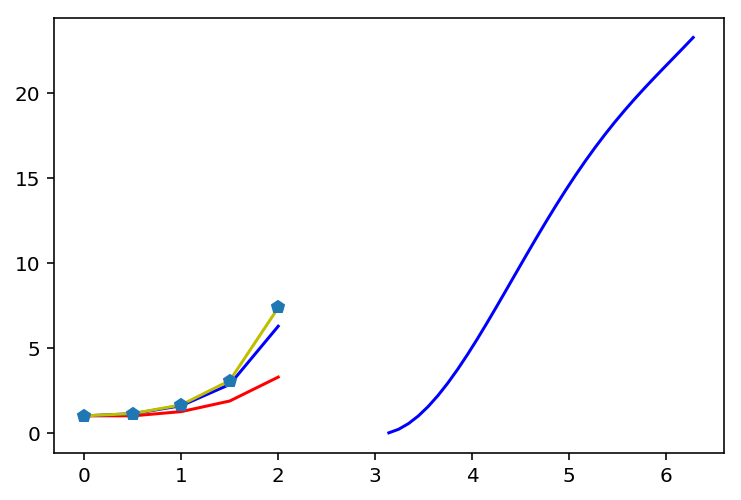

In [1]:
#Método Runge-Kutta 
# y' -xy = 0; y(0) = 1 ; y(2) = ?
# h= 0.5; h = 0.25
# y = e^(x^2/2)
import numpy as np
from math import exp
import matplotlib.pyplot as plt
x0 = 0
y0 = 1
xn = 2
h  = 0.5
f = lambda x,y: x*y
n = int(abs(x0-xn)/h) + 1
x = np.linspace(x0,xn,n)

def rk1(y0,h,f,x):
    y = []
    y.append(y0)
    for i in range(1,len(x)):
        y.append(y[i-1] + h * f(x[i-1],y[i-1]))
    return y

def rk2(y0,h,f,x):
    y = []
    y.append(y0)
    for i in range(1,len(x)):
        k1 = h * f(x[i-1],y[i-1])
        k2 = h * f(x[i-1] + h/2,y[i-1] + k1/2 )
        y.append(y[i-1] + k2)
    return y

def rk4(y0,h,f,x):
    y = []
    y.append(y0)
    for i in range(1,len(x)):
        k1 = h * f(x[i-1],y[i-1])
        k2 = h * f(x[i-1] + h/2,y[i-1] + k1/2 )
        k3 = h * f(x[i-1] + h/2,y[i-1] + k2/2 )
        k4 = h * f(x[i-1]  + h,y[i-1] + k3 )
        y.append(y[i-1] + 1/6*(k1 + 2*k2 + 2*k3 + k4))
    return y

plt.plot(x,rk1(y0,h,f,x),'r')
plt.plot(x,rk2(y0,h,f,x),'b')
plt.plot(x,rk4(y0,h,f,x),'y')
plt.plot(x,[exp(xi**2/2) for xi in x],'p')


# y'' + y = 4x +10senx; y(pi)=0 y'(pi) = 2; y(2pi) = ?
# Solucion 9picosx + 7senx+4x-5xcosx
from math import pi,sin
import numpy as np
import matplotlib.pyplot as plt
x0 = pi
xn = 2*pi
h = 0.1
n = int(abs(x0-xn)/h + 1)
x = np.linspace(x0,xn,n)
dy = lambda x,y,u: u
du = lambda x,y,u: 4*x+10*sin(x) -y
y0 = 0
u0 = 2

def rk4_2(y0,u0,h,dy,du,x):
    y = []
    y.append(y0)
    u = []
    u.append(u0)
    for i in range(1,len(x)):
        l1 = h * du(x[i-1],y[i-1],u[i-1])
        k1 = h * dy(x[i-1],y[i-1],u[i-1])
        l2 = h * du(x[i-1] + h/2,y[i-1] + l1/2, u[i-1] + l1/2)
        k2 = h * dy(x[i-1] + h/2,y[i-1] + k1/2, u[i-1] + k1/2)
        l3 = h * du(x[i-1] + h/2,y[i-1] + l2/2,u[i-1] + l2/2 )
        k3 = h * dy(x[i-1] + h/2,y[i-1] + k2/2, u[i-1] + k2/2)
        l4 = h * du(x[i-1]  + h,y[i-1] + l3 ,u[i-1] + l3)
        k4 = h * dy(x[i-1]  + h,y[i-1] + k3 ,u[i-1] + k3 )
        y.append(y[i-1] + 1/6*(k1 + 2*k2 + 2*k3 + k4))
        u.append(u[i-1] + 1/6*(l1 + 2*l2 + 2*l3 + l4))
    return y

plt.plot(x,rk4_2(y0,u0,h,dy,du,x),'b')